In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
data_path = 'logistic_regression_assignment_data.csv'

df = pd.read_csv(data_path)
df

,category,text
0,0,worldcom boss left books alone former worldc...
1,1,tigers wary of farrell gamble leicester say ...
2,1,yeading face newcastle in fa cup premiership s...
3,1,henman hopes ended in dubai third seed tim hen...
4,1,wilkinson fit to face edinburgh england captai...
...,...,...
1012,0,wall street cool to ebay s profit shares in on...
1013,0,ban on forced retirement under 65 employers wi...
1014,1,time to get tough on friendlies for an intern...
1015,0,christmas shoppers flock to tills shops all ov...


In [3]:
df.shape

(1017, 2)

In [4]:
df['category'].value_counts()

1    509
0    508
Name: category, dtype: int64

In [5]:
text = df['text']
category = df['category']

train_text, test_text, train_category, test_category = train_test_split(text, category, test_size= 0.2, random_state = 42, stratify= category)
print("Shape of Train_Text = ", train_text.shape)
print("Shape of Test_Text = ", test_text.shape)
print("Shape of Train_Category = ", train_category.shape)
print("Shape of Test_Category = ", test_category.shape)

Shape of Train_Text =  (813,)
Shape of Test_Text =  (204,)
Shape of Train_Category =  (813,)
Shape of Test_Category =  (204,)


In [6]:
vectorizer = TfidfVectorizer(ngram_range=(2, 3), max_features=2000, min_df = 10)

In [7]:
train_vectors = vectorizer.fit_transform(train_text)
test_vectors = vectorizer.transform(test_text)
train_vectors.shape, test_vectors.shape

#test ony contains .transform mrthod
#train always contains fit.transforms

((813, 2000), (204, 2000))

In [8]:
vectorizer.get_feature_names_out()

array(['000 jobs', '000 people', '12 months', ..., 'you have',
       'you have to', 'you need'], dtype=object)

In [9]:
dim = train_vectors.shape[1]
dim

2000

In [10]:
scaler = StandardScaler(with_mean=False,with_std=False)
scaler

StandardScaler(with_mean=False, with_std=False)

In [11]:
train_vectors_stand = scaler.fit_transform(train_vectors)
test_vectors_stand =  scaler.transform(test_vectors)
train_vectors_stand.shape,test_vectors_stand.shape

((813, 2000), (204, 2000))

In [12]:

#plt.title("Standard data")
#plt.plot('train_vectors_stand[0].tolist')
#plt.show()

In [13]:
#print(train_vectors_stand)

In [14]:
def initialize_weights_bias(dim):
    ''' In this function, we will initialize our weights and bias terms'''
    

    # Initialize the weights to zeros array of (dim) dimensions. Here dim will be the number of features of your tfidf vectorizer output.
    # You can initialize the weight terms with zeros.
    # Initialize bias term to zero
    # Write your code below.
    w = np.zeros(dim)
    b = 0
    return w,b

In [15]:
weight_init = initialize_weights_bias(dim)
print(weight_init)

(array([0., 0., 0., ..., 0., 0., 0.]), 0)


In [16]:
# Grader function to check the initialization of your weights and bias terms.
def grader_weights_bias(w,b):
  assert((len(w)==2000) and b==0)
  return True

dim = 2000
w,b = initialize_weights_bias(dim)
grader_1 = grader_weights_bias(w,b)
print("Grader_1 Status : ", grader_1)

Grader_1 Status :  True


In [17]:
def custom_sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    
    # Compute sigmoid(z) and return its value.
    # Write your code below.
    
    sigmoid = 1/(1 + np.exp(-z))
    return sigmoid

In [18]:
def grader_sigmoid(z):
  val = custom_sigmoid(z)
  assert(val==0.8807970779778823)
  return True

grader_2 = grader_sigmoid(2)
print("Grader_2 Status : ", grader_2)

Grader_2 Status :  True



𝑙𝑜𝑔𝑙𝑜𝑠𝑠 =  −1∗1𝑛Σ𝑓𝑜𝑟𝑒𝑎𝑐ℎ𝑌𝑡𝑟𝑢𝑒,𝑌𝑝𝑟𝑒𝑑(𝑌𝑡𝑟𝑢𝑒𝑙𝑜𝑔10(𝑌𝑝𝑟𝑒𝑑)+(1−𝑌𝑡𝑟𝑢𝑒)𝑙𝑜𝑔10(1−𝑌𝑝𝑟𝑒𝑑)) 


𝐿1𝑙𝑜𝑠𝑠=Σ𝑓𝑜𝑟𝑒𝑎𝑐ℎ𝑤(|𝑤|)

𝑡𝑜𝑡𝑎𝑙𝑙𝑜𝑠𝑠=𝑙𝑜𝑔𝑙𝑜𝑠𝑠+𝑎𝑙𝑝ℎ𝑎∗𝐿1𝑙𝑜𝑠𝑠

Where alphas is the regularization parameter

In [19]:
import itertools
import math
from math import log10

In [20]:
def absloute_value(values):
    l1_loss = 0
    for v in values:
        l1_loss += abs(v)
    return l1_loss

In [21]:
def custom_loss(y_true, y_pred, alpha, weights):
    '''In this function, we will compute total loss which is [(logloss) + (alpha * L1regularization loss)] '''
    
    # Write your code below.
    
    log_loss = 0
    n = len(y_true)
    
    for y_true, y_pred in zip(y_true,y_pred):
         log_loss += y_true*np.log10(y_pred)+(1-y_true)*log10(1-y_pred)
    
    log_loss = -log_loss/n
    
    l1_loss = absloute_value(weights)
 
    total_loss = log_loss + (alpha*l1_loss) 
    
    return total_loss

In [22]:
# Grader function to check the implementaiton of logloss

def grader_loss():
    true_values = [1,1,0,1,0]
    pred_values = [0.9,0.8,0.1,0.8,0.2]
    w= np.array([0.1]*10)
    alpha= 0.0001
    loss = custom_loss(true_values, pred_values,alpha,w)
    assert(loss == 0.07644900402910389+0.0001*10*0.1)
    return True


grader_3 = grader_loss()
print("Grader_3 Status : ", grader_3)

Grader_3 Status :  True


𝐿𝑖 = −(𝑌𝑖𝑙𝑜𝑔10(𝝈𝑖) − (1−𝑌𝑖)𝑙𝑜𝑔10(1−𝝈𝑖) + 𝑎𝑙𝑝ℎ𝑎/𝑁*(𝑠𝑢𝑚(|𝑤|)) 

𝑊ℎ𝑒𝑟𝑒:𝝈𝑖 = σ(𝑤𝑇𝑥𝑖+𝑏) 

And: L1 regularization =  𝑎𝑙𝑝ℎ𝑎/𝑁*(𝑠𝑢𝑚(|𝑤|))

Alpha: It is the Regularization parameter

N : number of training examples

σ : sigmoid function <b

𝑑𝐿𝑖/𝑑𝑤 = −𝑌𝑖 𝑥𝑖(1−𝝈𝑖) + (1−𝑌𝑖)𝑥𝑖𝝈𝑖 + (𝑎𝑙𝑝ℎ𝑎/𝑁)*( (𝑤 + (1𝑒−5)) / |𝑤+(1𝑒−5)| )

                        
NOTE THAT: 1e-5 used in numerator and denominator to avoid division error

𝑑𝐿𝑖/𝑑𝑏 = −𝑌𝑖(1−𝝈𝑖) + (1−𝑌𝑖)𝝈𝑖 


Hence,
                        
𝑑𝐿𝑖/𝑑𝑤 = 𝑑𝑤 = (𝝈𝑖−𝑌𝑖)𝑥𝑖 + 𝑎𝑙𝑝ℎ𝑎/𝑁 * ( (𝑤 + (1𝑒−5))|𝑤 + (1𝑒−5)|) ) 

1e-5 used in numerator and denominator to avoid division error

𝑑𝐿𝑖/𝑑𝑏 = 𝑑𝑏 = 𝝈𝑖−𝑌𝑖 

z =2
w,b = initialize_weights_bias(dim)

alpha = 0.0001
N = 2000                                                       
x = np.array(train_vectors)
y = np.array(df["category"])                                               
gradient_dw(x, y, w, b, alpha, N)

z = np.dot(w, x) + b

dw = x*(y - sigmoid(z)) - ((1/alpha)*(1/N) * w)


dLi/dw = dw= (σi−Yi)xi + alphaNw + (1e−5)|w+(1e−5)| 

1e-5 used in numerator and denominator to avoid division error

dLi/db=db=σi−Yi

In [23]:
def gradient_dw(x, y, w, b, alpha, N):
    '''In this function, we will compute the gardient w.r.t. w '''
    # Write your code below.
    dw = ((custom_sigmoid(np.dot(x, w) + b) - y) *  x) + ((alpha/N) * (w + 1e-5 / abs(w + 1e-5)))
    return dw

In [24]:
def gradient_db(x, y, w, b):
    '''In this function, we will compute the gardient w.r.t. b '''
    # Write your code below.
    db = custom_sigmoid(np.dot(w,x) + b) - y
    return db

  Implement the code as follows:
    """
  In this function we will compute optimal values for weights and bias terms on
  the train data. 

  Here eta0 is the learning rate and alpha is the regularization term.
  """

  1. Initalize the weights (call the initialize_weights(X_train[0]) function)
  2. Repeat For many epochs until condition "e"  fails
          # a) for every data point(X_train,y_train)
                # compute gradient w.r.to w (call the gradient_dw() function)
                # compute gradient w.r.to b (call the gradient_db() function)
                # update w, b using the above eqns
          # b) predict the output of x_train[for all data points in X_train] using w,b
          # c) compute the loss between predicted and actual values (call the loss function)
          # d) store all the train loss values in a list
          # e) Compare previous loss and current loss, if the difference between loss is not more than or equal to the tolerance, stop the process and return w,b

   3. Return the values of weights, bias, train_loss and num_epochs 

In [25]:
def custom_train(X_train, y_train, alpha, eta0,tolerance):
    N = X_train.shape[1]
    w, b = initialize_weights_bias(N)
    # *((w + (np.exp(-5))) / (w + abs(np.exp(-5))))   #w+(1e−5)|
    epoch = 200
    train_losses = []
    
    for epoch in range(epoch):
        for x, y in zip(X_train, y_train):
            dw = gradient_dw(x, y, w, b, alpha, N)
            db = gradient_db(x, y, w, b)
            w = w - eta0 * dw
            b = b - eta0 * db
        y_pred = [custom_sigmoid(np.dot(w, x)) for x in X_train]
        train_loss = custom_loss(y_train, y_pred, alpha, w)
        train_losses.append(train_loss)
        
        if len(train_losses)>=2 and train_losses[-2] - train_losses[-1]  <  tolerance:
              break

        print(f"Epoch: {epoch} Train Loss: {train_loss}")

    return w, b, train_losses, epoch

In [26]:
def grader_weights_bias():
    clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, 
                                     loss='log_loss', random_state=15, 
                                     penalty='l1', tol=1e-3, 
                                     learning_rate='constant'
                                    )
    clf.fit(train_vectors_stand,train_category.values)
    model_coef = clf.coef_[0]

    # fitting custom train with same learning rate, regularization and tolerance as of sklearn
    w, b, _, epoch = custom_train(train_vectors_stand.toarray(), train_category.values, 0.0001,0.0001,1e-3)

    # checking whether the weights and bias returned by both the implementations are closer
    print(f"Weights: {w}")
    print(f"SGD Weights: {model_coef}")
    print(f"Bias {b} SGB Bias {clf.intercept_}")
    
    for wdiff in (w - model_coef):
        #print(f"Weights Difference: {wdiff}")
        if wdiff > 0.02:
            print(f"----------{wdiff}")
    
    assert(not (b - clf.intercept_>0.02)==True)
    assert((not (w - model_coef>0.02).any())==True)

    return True

In [27]:
grader_4 = grader_weights_bias()
print("Grader_4 Status : ", grader_4)

Epoch: 0 Train Loss: 0.30091950891663255
Weights: [-2.60285681e-04 -1.88837739e-04 -1.80145788e-05 ...  2.31933405e-04
  1.57175797e-04  1.14236868e-04]
SGD Weights: [-7.31962530e-04 -5.19249656e-04 -5.42397981e-06 ...  6.46917855e-04
  4.22730730e-04  2.94555212e-04]
Bias 9.411542029356958e-05 SGB Bias [3.13505211e-06]
Grader_4 Status :  True


Epoch: 0 Train Loss: 0.30091950891663255


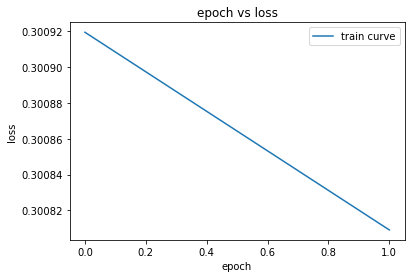

In [28]:
# plotting graph for epoch vs loss for train and test data

w,b,train_loss,epochs = custom_train(train_vectors_stand.toarray(), train_category.values, 0.0001,0.0001,0.001)
plt.plot(range(epochs+1), train_loss, label='train curve')
plt.title('epoch vs loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [29]:
def predict(w,b, X):
    
    '''function to predict label given weights, bias and standardized data'''
    
    #m = X.shape[1]
    #Y_prediction = np.zeros((1, m))
    #w = w.reshape(X.shape[0], 1)
    
    predictions = []
    for x in X:
        z = np.dot(w, x) + b
        prediction = custom_sigmoid(z)
        predictions.append(prediction)
    
    return np.array(predictions) #it should be a numpy array

In [30]:
def grader_predict():
    ''' grader to check the test accuracy'''
    
    w, b, _, _ = custom_train(train_vectors_stand.toarray(), train_category.values, 0.0001,0.0001,0.001)
    
    test_preds = predict(w, b, test_vectors_stand.toarray())
    
    test_preds = [ 1 if test >= 0.5 else 0 for test in test_preds]
    
    test_accuracy = (np.sum(test_category == test_preds)/len(test_preds))*100
    
    if (test_accuracy >= 90):
        print("Success!")
    else:
        print("Failed! \n Test accuracy = ", test_accuracy)
    return
  
grader_predict()

Epoch: 0 Train Loss: 0.30091950891663255
Success!


In [31]:
def custom_train_v2(X_train, y_train,alpha, eta0, tolerance):
    """
    In this function we will compute optimal values for weights and bias terms on
    the train data. 

    Here eta0 is the learning rate and alpha is the regularization term.
    """
    #array to store train loss for each epoch
    train_loss=[]

  # Implement the code as follows:

  # 1. Initalize the weights (call the initialize_weights(X_train[0]) function)
    
    
  # 2. Repeat For many epochs until condition "e"  fails
          # a) for every data point(X_train,y_train)
                # compute gradient w.r.to w (call the gradient_dw() function)
                # compute gradient w.r.to b (call the gradient_db() function)
                # update w, b using the above eqns
          # b) predict the output of x_train[for all data points in X_train] using w,b
          # c) compute the loss between predicted and actual values (call the loss function)
          # d) store all the train loss values in a list
          # e) Compare previous loss and current loss, if the difference between loss is not more than or equal to the tolerance, stop the process and return w,b

  # 3. Return the values of weights, bias, train_loss and num_epochs 
  
  #initializing the weights and bias
    w,b=initialize_weights_bias(X_train.shape[1])

  #storing the number of train points in N
    N=len(X_train)

  #number of epochs the model is trained
    num_epochs=0

  #condition to run the training for more epochs
    cond=True

  #checking whether to run the training for more epochs
    while(cond):
    
    #looping through each datapoint
    
        for j in range(len(X_train)):
            x=X_train[j]
            y=y_train[j]

            #computing gradients
            dw=gradient_dw(x,y,w,b,alpha,N)
            db=gradient_db(x,y,w,b)

            #updating weights
            w=w-eta0*dw
            b=b-eta0*db

    #computing y_pred for entire train data as y_pred= sigmoid(wTx+b)
        y_pred_train = np.array([custom_sigmoid(np.dot(w,X_traini)+b) for X_traini in X_train])

    #adding the train loss of current epoch to the list
        train_loss.append(custom_loss(y_train,y_pred_train,alpha,w))

    #checking whether loss has improved from previous epoch by atleast tolerance
    
        if num_epochs>0:
            cond = ((train_loss[num_epochs - 1] - train_loss[num_epochs]) >= tolerance)

    #increasing the number of epochs the model is trained.
        num_epochs=num_epochs + 1

    #decreasing learning rate by 10% each epoch
        eta0 = eta0*0.90  

    return w,b,train_loss,num_epochs

In [32]:
a, b, c, n = custom_train_v2(train_vectors_stand.toarray(), train_category.values, 0.0001,0.0001,1e-3)

In [33]:
print(a)


[-2.47276510e-04 -1.79402928e-04 -1.71369523e-05 ...  2.20339193e-04
  1.49317656e-04  1.08524353e-04]


In [34]:
print(b)


8.96738752418314e-05
